# Wcat data  annalysis 

In [1]:
# lets import files Wcat
wcat <- read.csv(file.choose())

In [2]:
# viewing first 10 rows 
wcat[0:10,] 

,Waist,AT
,<dbl>,<dbl>
1,74.75,25.72
2,72.60,25.89
3,81.80,42.60
4,83.95,42.80
5,74.65,29.84
6,71.85,21.68
7,80.90,29.08
8,83.40,32.98
9,63.50,11.44


In [3]:
# structure of data frame 
str(wcat)
attach(wcat)
summary(wcat)

'data.frame':	109 obs. of  2 variables:
 $ Waist: num  74.8 72.6 81.8 84 74.7 ...
 $ AT   : num  25.7 25.9 42.6 42.8 29.8 ...


     Waist             AT        
 Min.   : 63.5   Min.   : 11.44  
 1st Qu.: 80.0   1st Qu.: 50.88  
 Median : 90.8   Median : 96.54  
 Mean   : 91.9   Mean   :101.89  
 3rd Qu.:104.0   3rd Qu.:137.00  
 Max.   :121.0   Max.   :253.00  

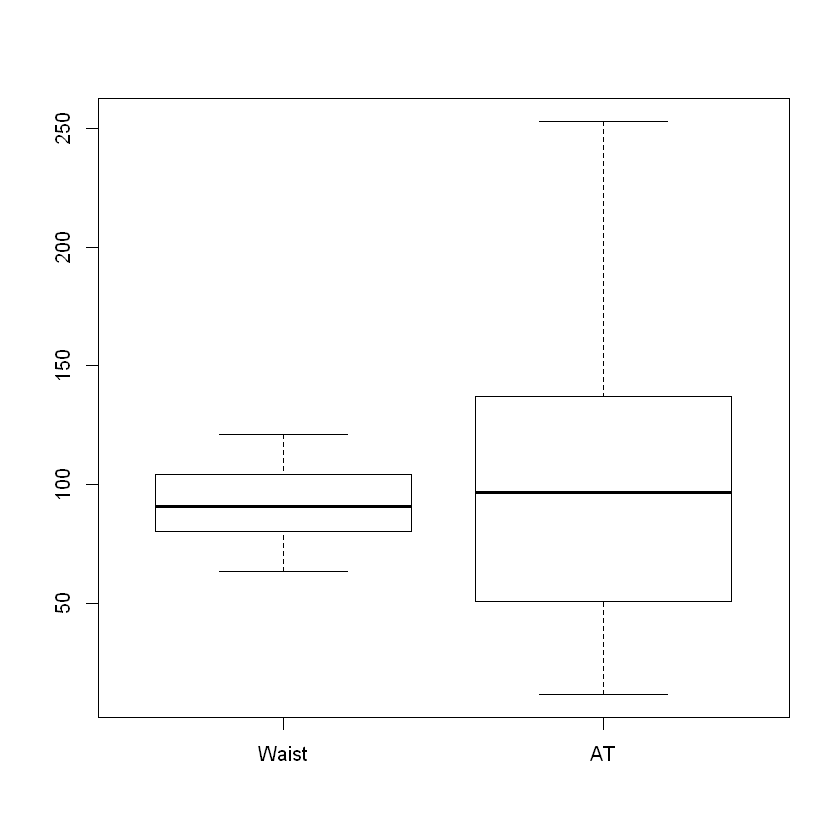

In [4]:
# priliminary investigation for outliers 
boxplot(wcat)
# as there is no outliers we can see 

In [5]:
library(moments) # both aer positive skewness 
skewness(AT)
skewness(Waist)

[1] 0.5767897

[1] 0.1322042

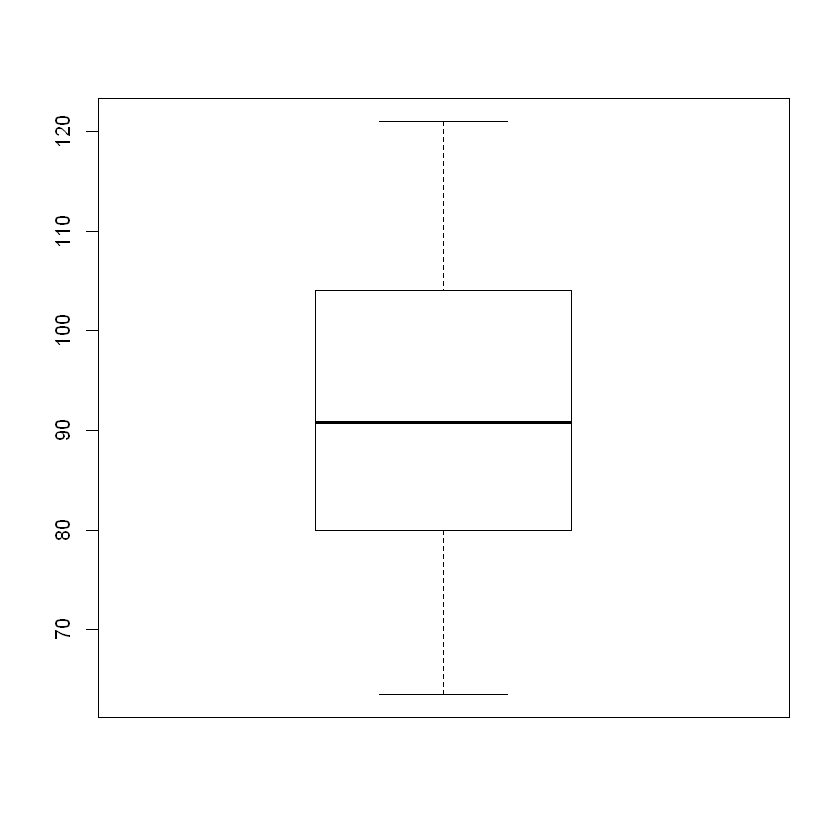

63.5
80.0
90.8
104.0
121.0
87.16792
94.43208


11.44
50.88
96.54
137.00
253.00
83.5069
109.5731


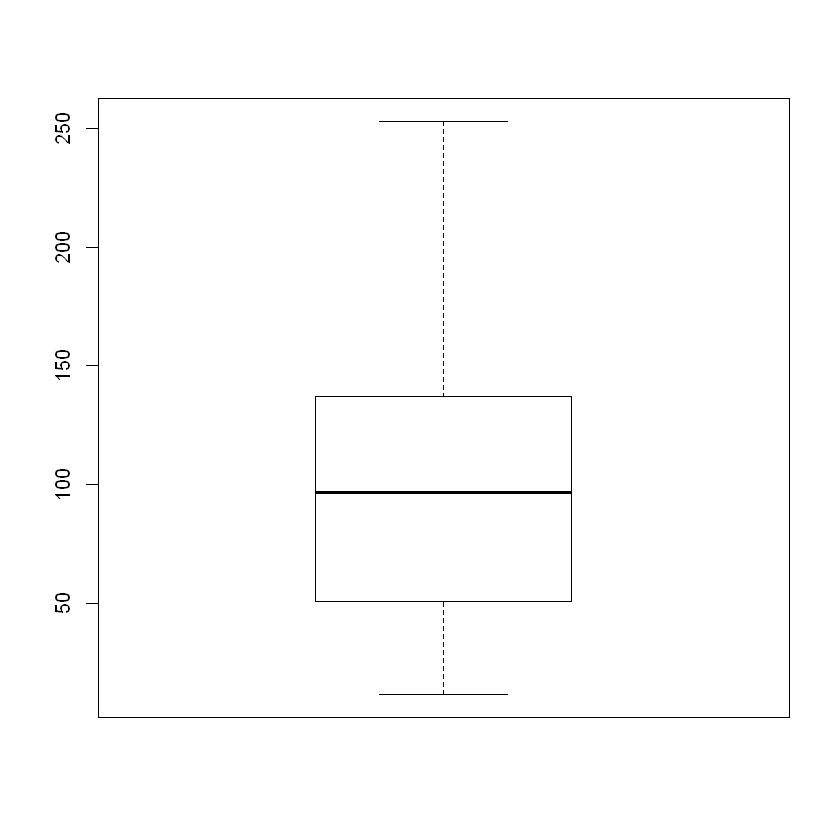

In [6]:
waist_outlier <- boxplot(Waist) # still looking for outliers if present methology 2 part of data cleaning 
at_outlier <-  boxplot(AT)
waist_outlier# to see the outliers at very begining 
at_outlier

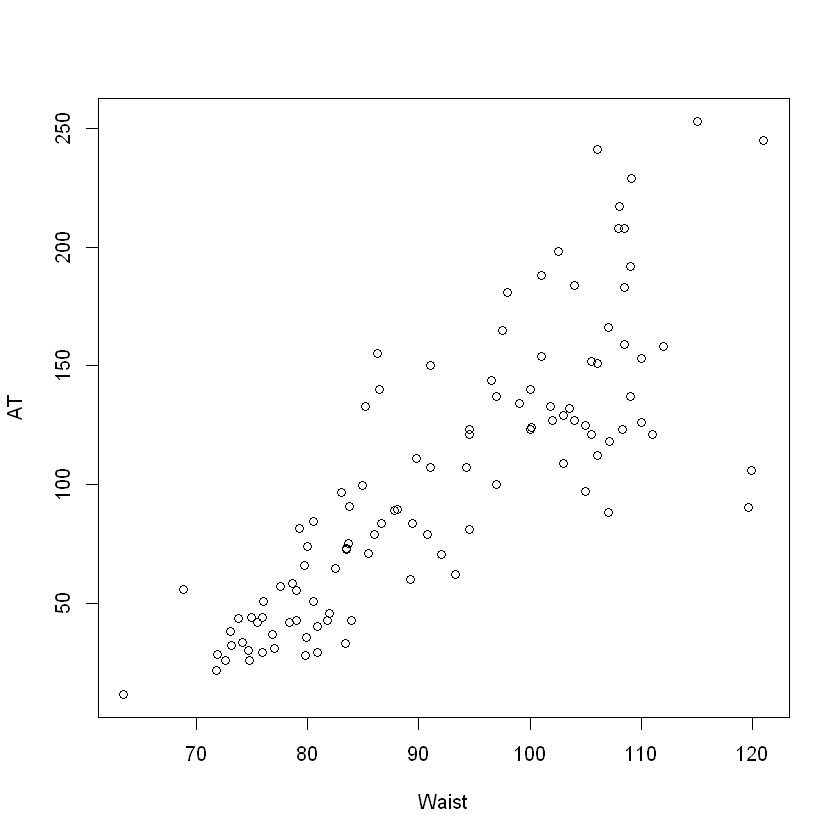

In [7]:
plot(Waist,AT ) # distance distance plot to see outliers both side

################################(Basics-Statistics & Visualizations EDA)###############################################

In [8]:
# Pre porcessing data checking for NA values 
dim(wcat)
str(wcat)  # data frame 
sum(is.na(wcat)==T) # as there is no NA value if 0 there is no na value exist

mean(wcat$Waist) # checking if perfectly mean is coming or not 
mean(wcat$AT) # mean is proof there is no NA value


[1] 109   2

'data.frame':	109 obs. of  2 variables:
 $ Waist: num  74.8 72.6 81.8 84 74.7 ...
 $ AT   : num  25.7 25.9 42.6 42.8 29.8 ...


[1] 0

[1] 91.90183

[1] 101.894

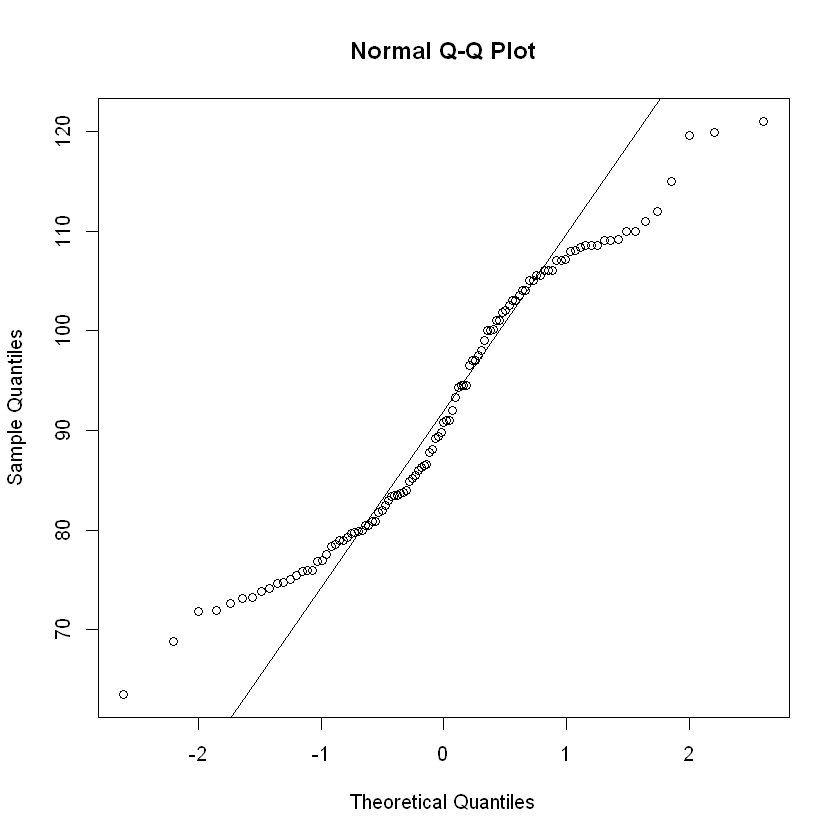

In [9]:
#normality check basic it seems data is not normal  as points are not no line 
qqnorm(Waist)
qqline(Waist)

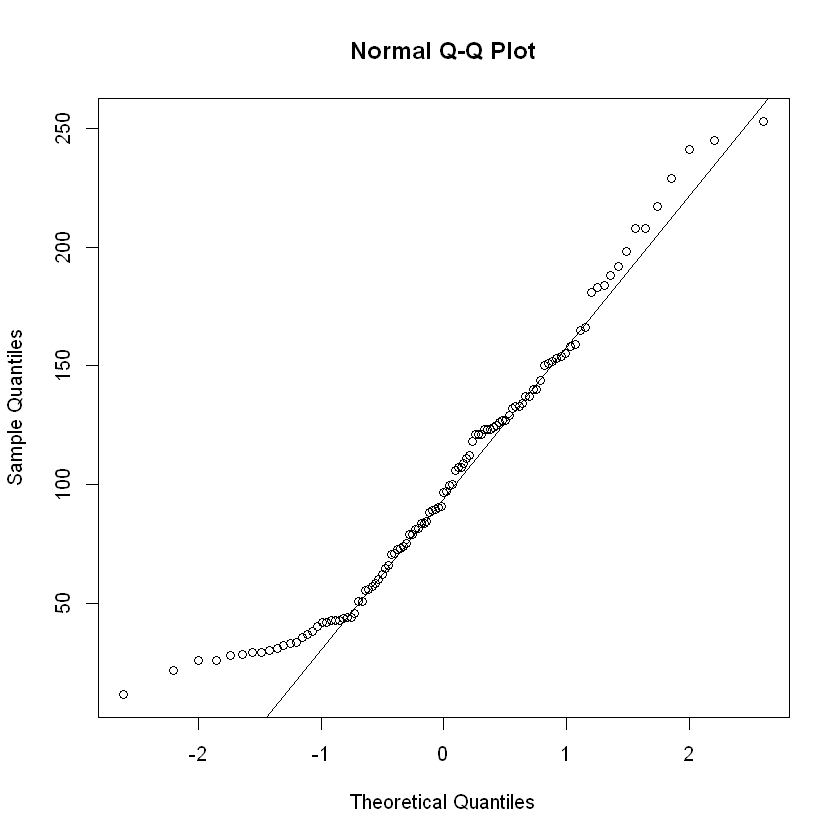

In [10]:
# lests check basic normality of AT it seems fit to the  normal but still need  a fix 
qqnorm(AT)
qqline(AT)

In [11]:
# lets check the cor-relation between those 2 variable 
cor(Waist,AT) # correlation is preety fine 

[1] 0.8185578

In [12]:
#sample split data into train test 80:20 ration 
library(ISLR)
attach(wcat)
smp_siz = floor(0.80*nrow(wcat))  # creates a value for dividing the data into train and test. In this case the value is defined as 75% of the number of rows in the dataset
smp_siz  # shows the value of the sample size

The following objects are masked from wcat (pos = 5):

    AT, Waist




[1] 87

In [13]:
set.seed(123)   # set seed to ensure you always have same random numbers generated
train_ind = sample(seq_len(nrow(wcat)),size = smp_siz)  # Randomly identifies therows equal to sample size ( defined in previous instruction) from  all the rows of Smarket dataset and stores the row number in train_ind
train =wcat[train_ind,] #creates the training dataset with row numbers stored in train_ind
test=wcat[-train_ind,]  # creates the test dataset excluding the row numbers mentioned in train_ind

In [14]:
test # we can see data is splitede 80:20 ration split

,Waist,AT
,<dbl>,<dbl>
1,74.75,25.72
2,72.60,25.89
10,73.20,32.22
11,71.90,28.32
19,73.80,43.35
20,75.90,29.31
24,89.20,60.09
28,80.50,84.30
29,86.00,78.89


[1] 32.76018

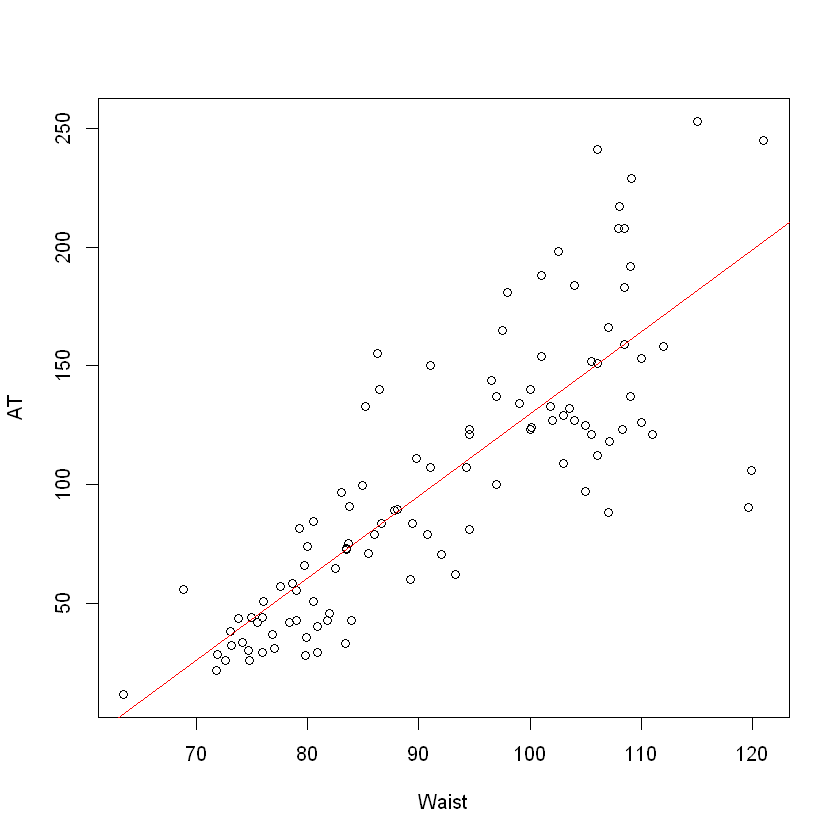

In [15]:
# we trying to fit a linear regression line  by plotting linear model 
lm <- lm(AT~Waist,data=wcat) # linear model
rmse <- sqrt(mean(lm$residuals^2))
rmse
plot(Waist, AT) # scatter plot X is Waist and y is AT
abline(lm(AT~Waist,data = wcat),col = 'red') # made a regression line 

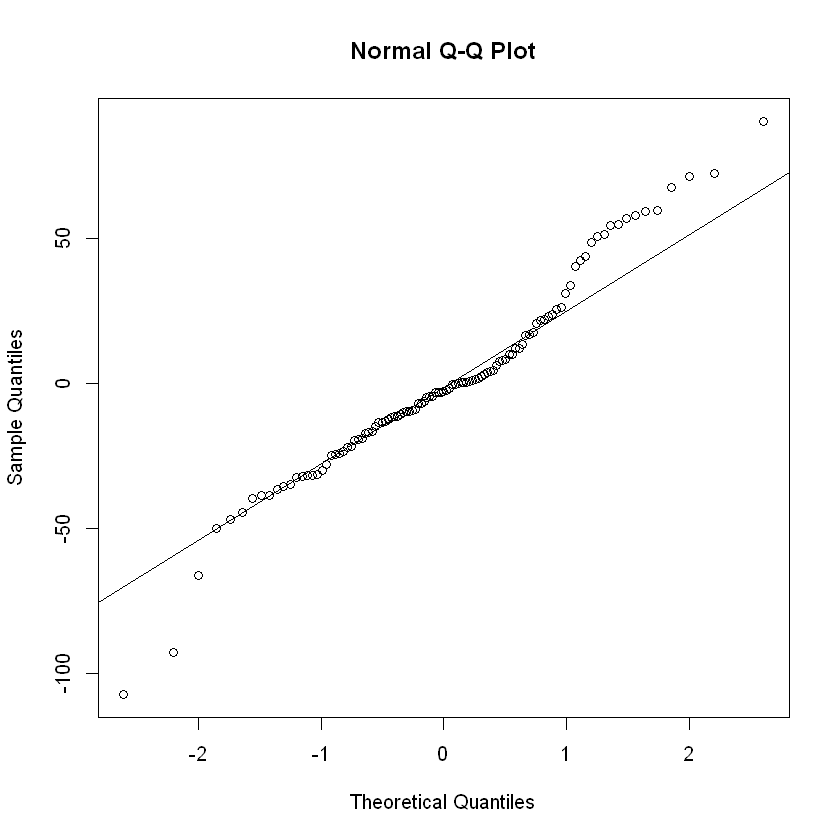

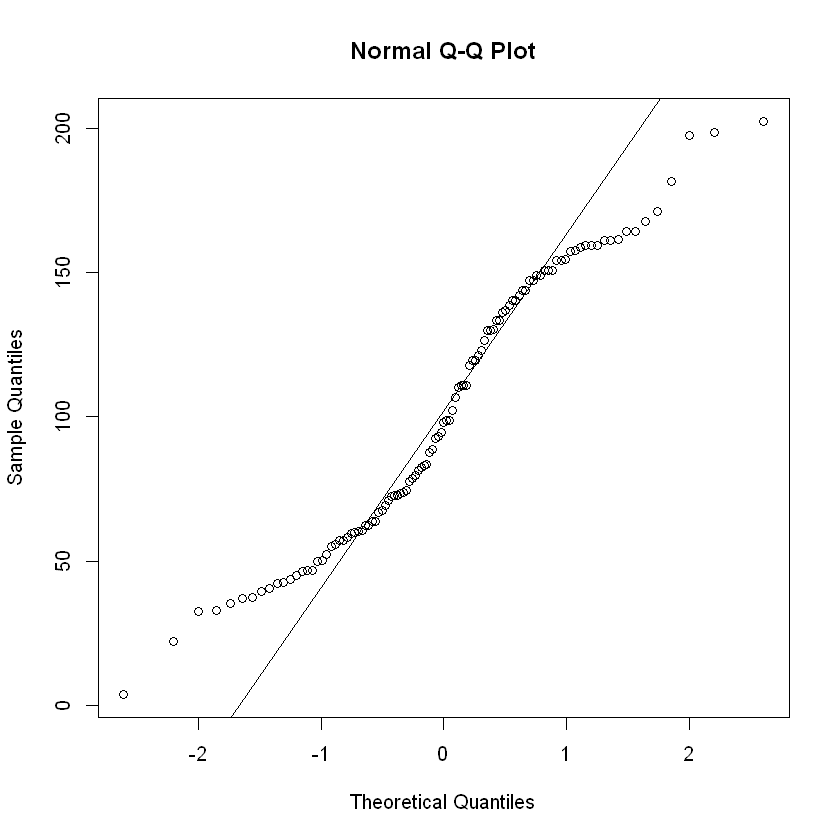

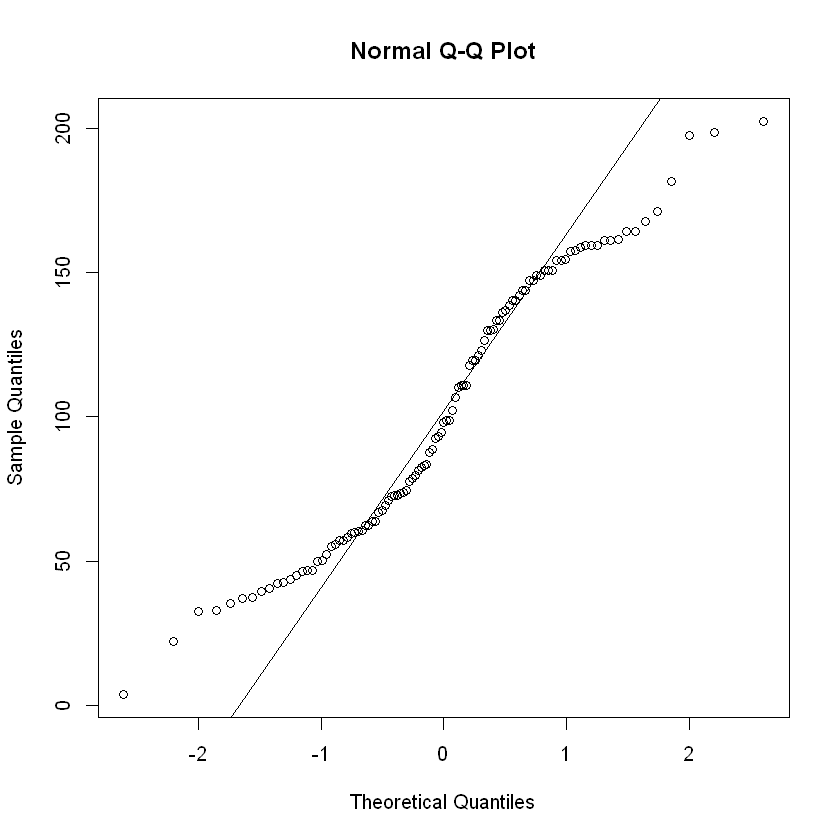

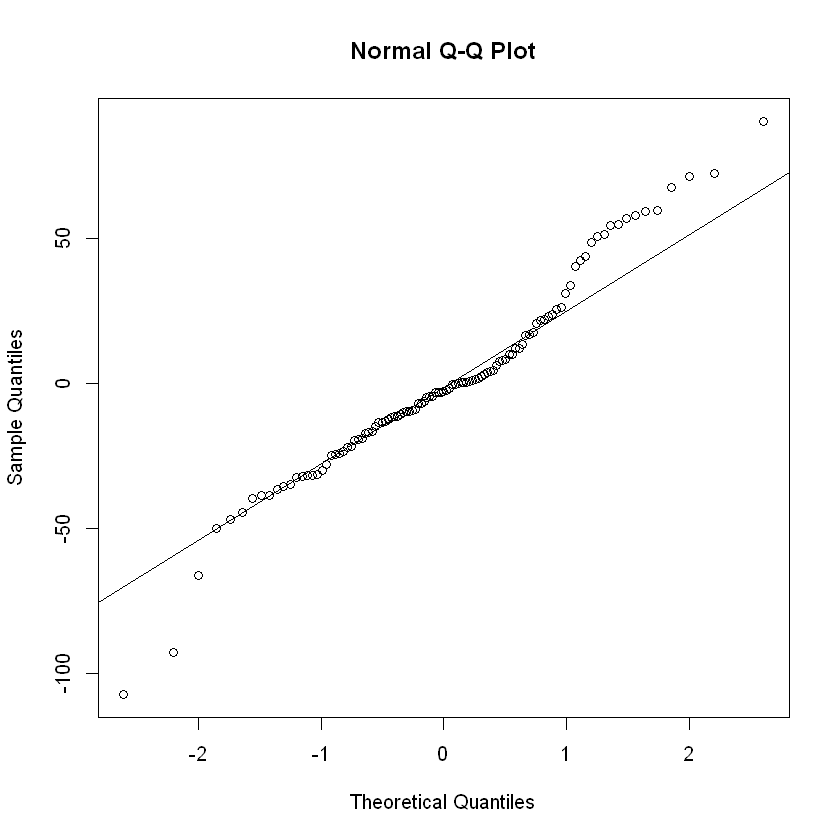

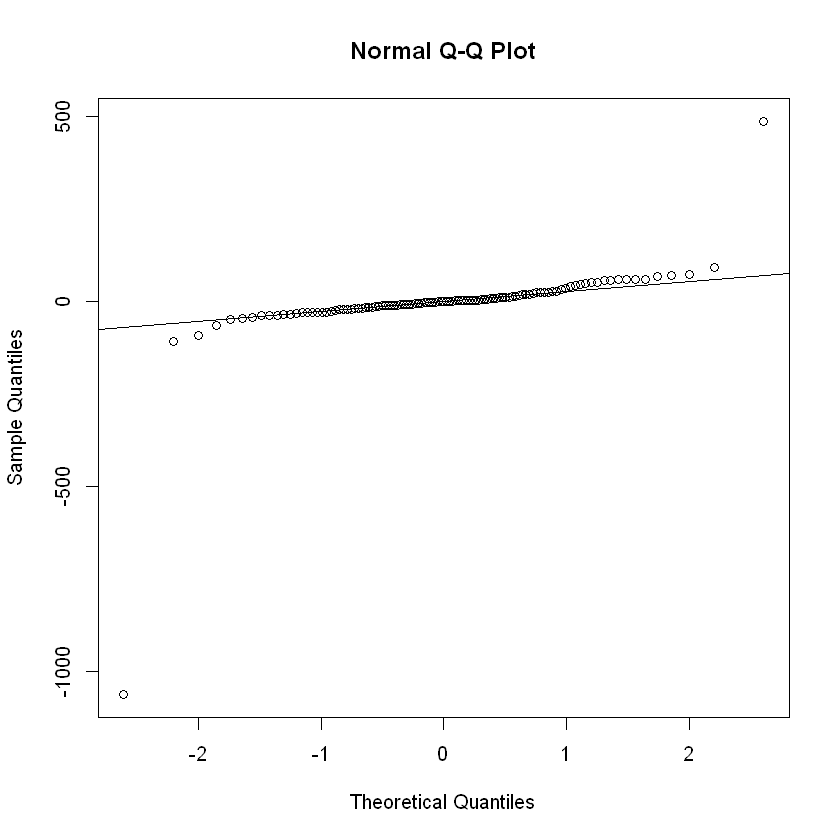

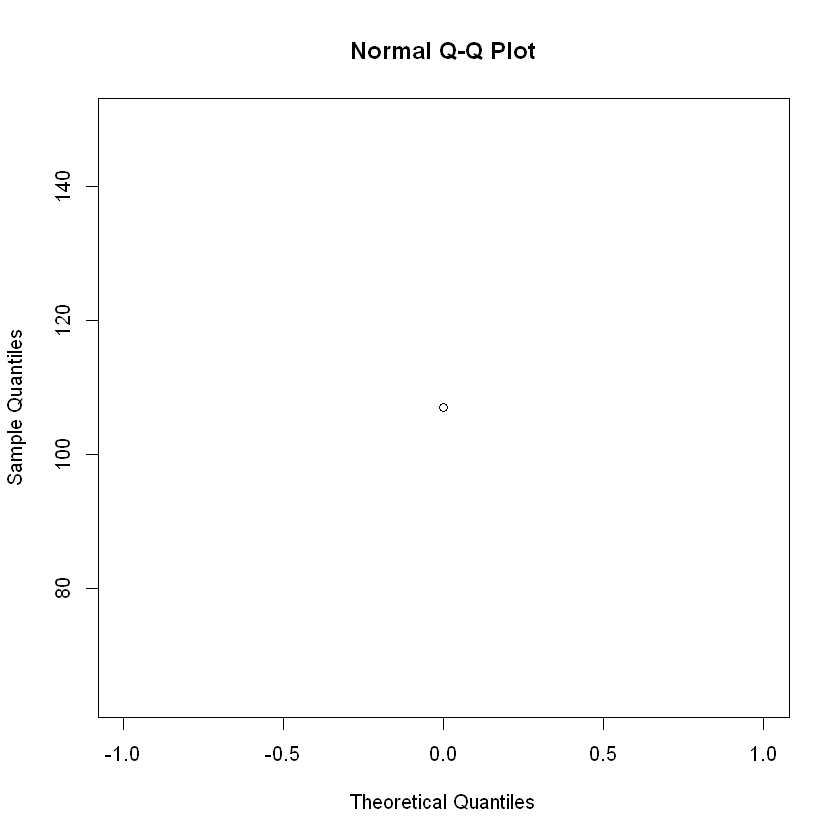

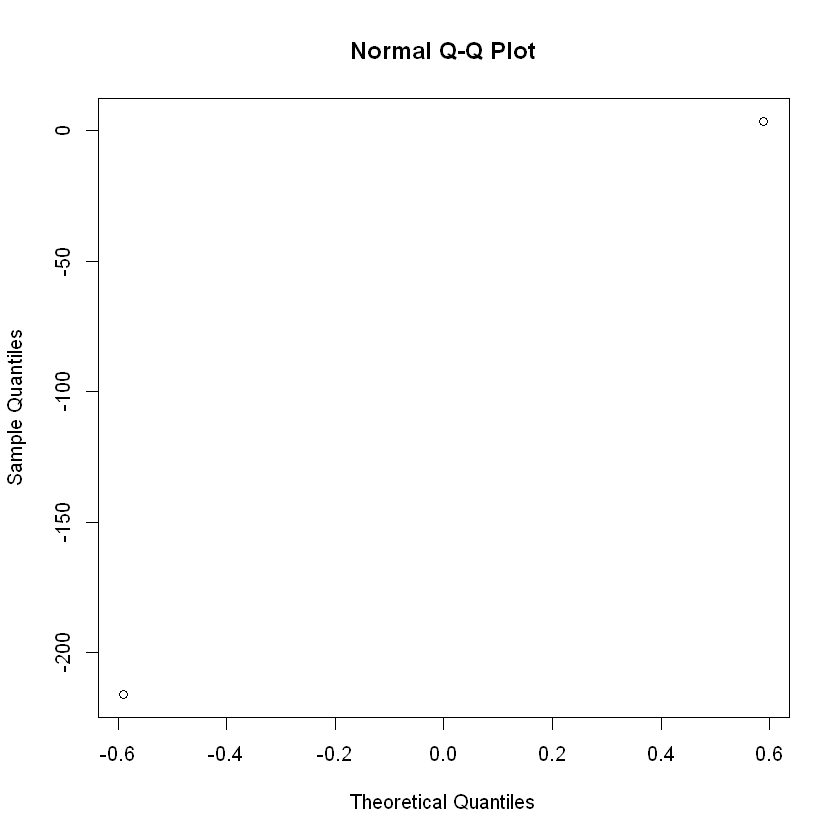

In [16]:
# Dignosis of model in qqnorm mothod

qqnorm(resid(lm))# checking linearity residuals of linear model
qqline(resid(lm)) # trying to fitting a line on the model made
qqnorm(fitted(lm)) # checking fittled 
qqline(fitted(lm)) # linear model fitting line
qqnorm(fitted.values(lm))# checking fitted values
qqline(fitted.values(lm))# checking fitted values
qqnorm(residuals(lm))# checking residials 
qqline(residuals(lm))# fitting line on residuals
qqnorm(effects(lm)) # effects of lm in quantiles
qqline(effects(lm)) # fitting line on effects
qqnorm(df.residual(lm)) # checking digree of freedom
qqnorm(coefficients(lm))# checking cofficnent point on lm. 


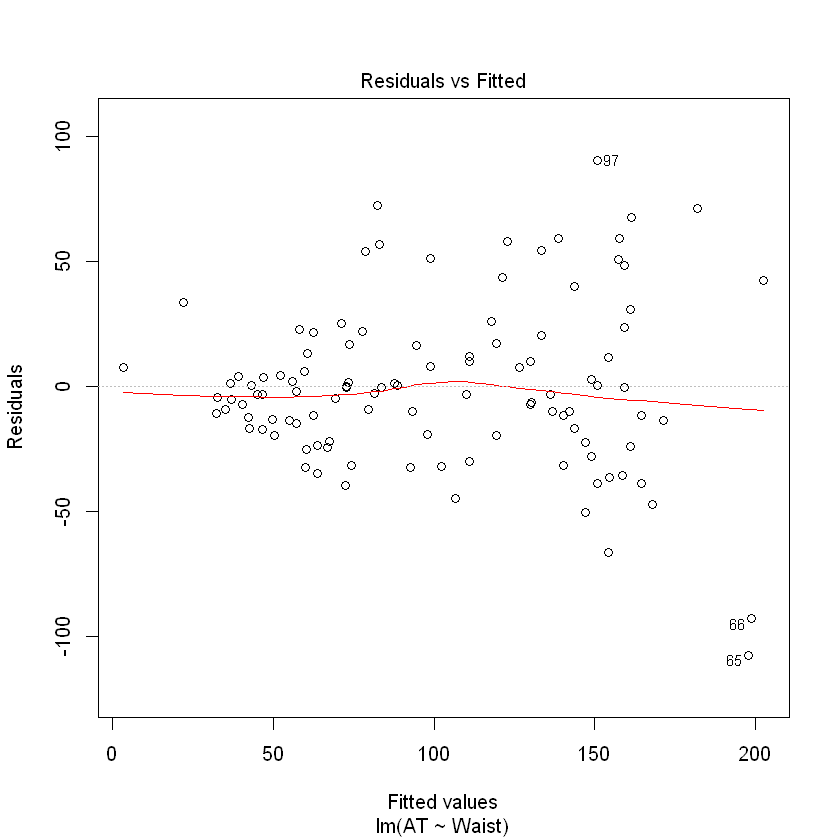

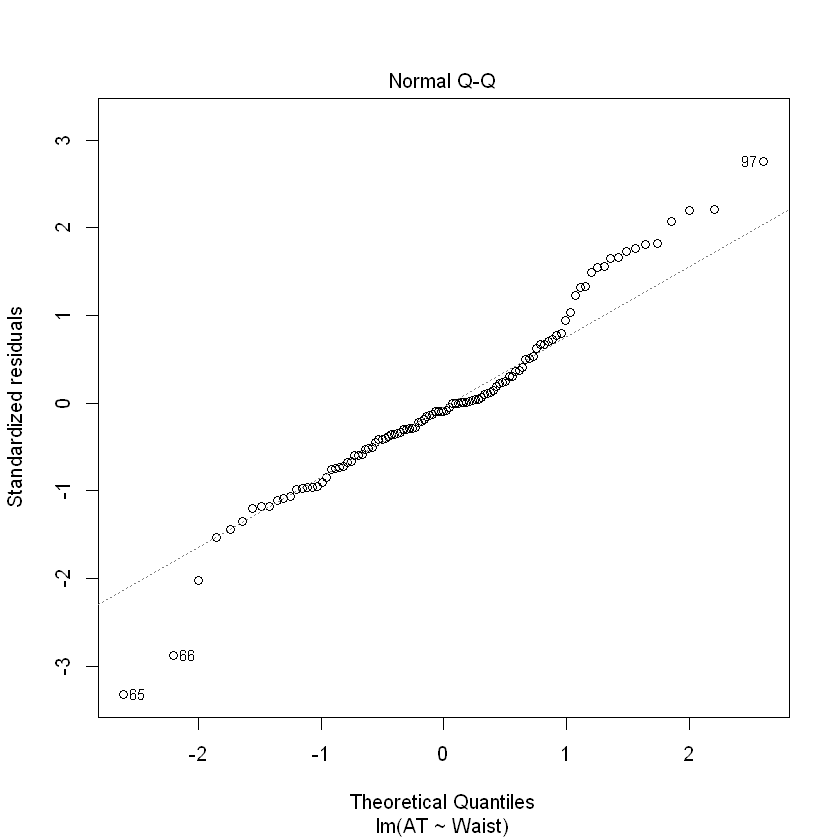

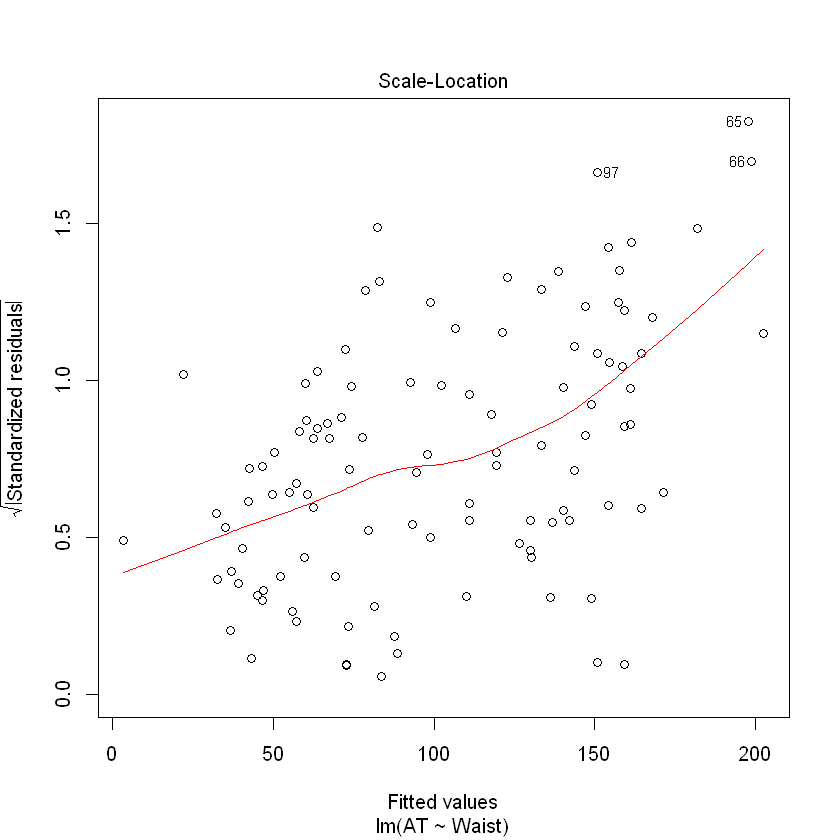

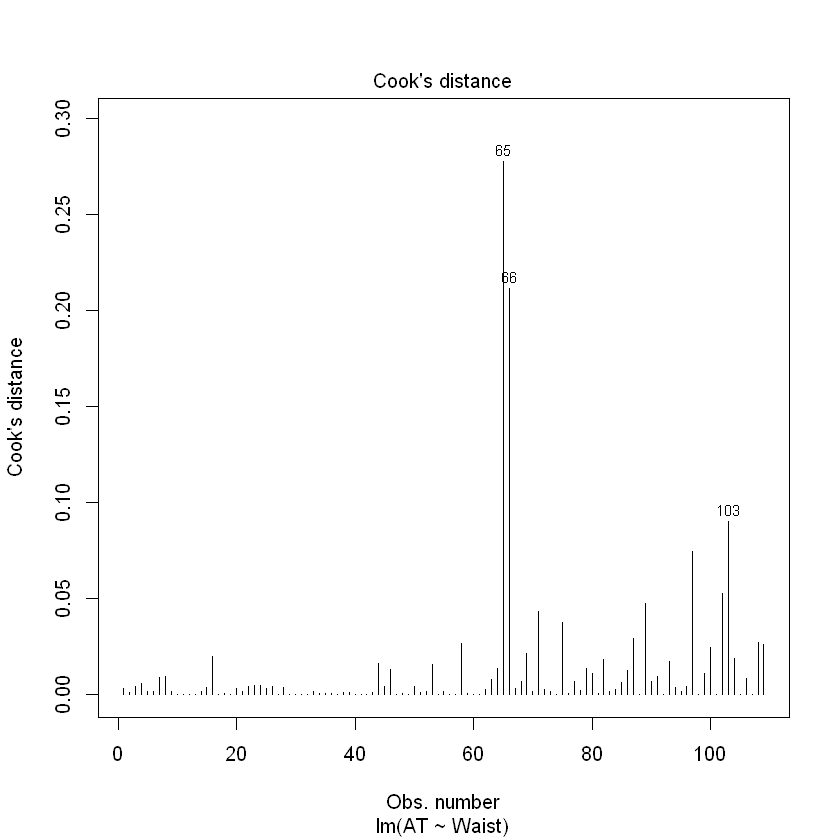

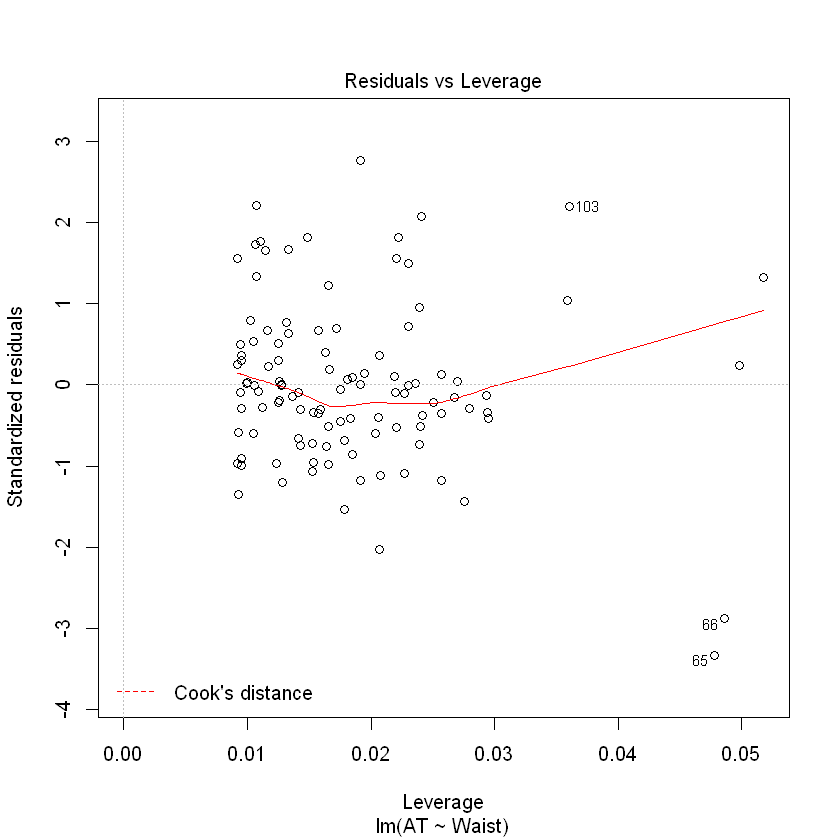

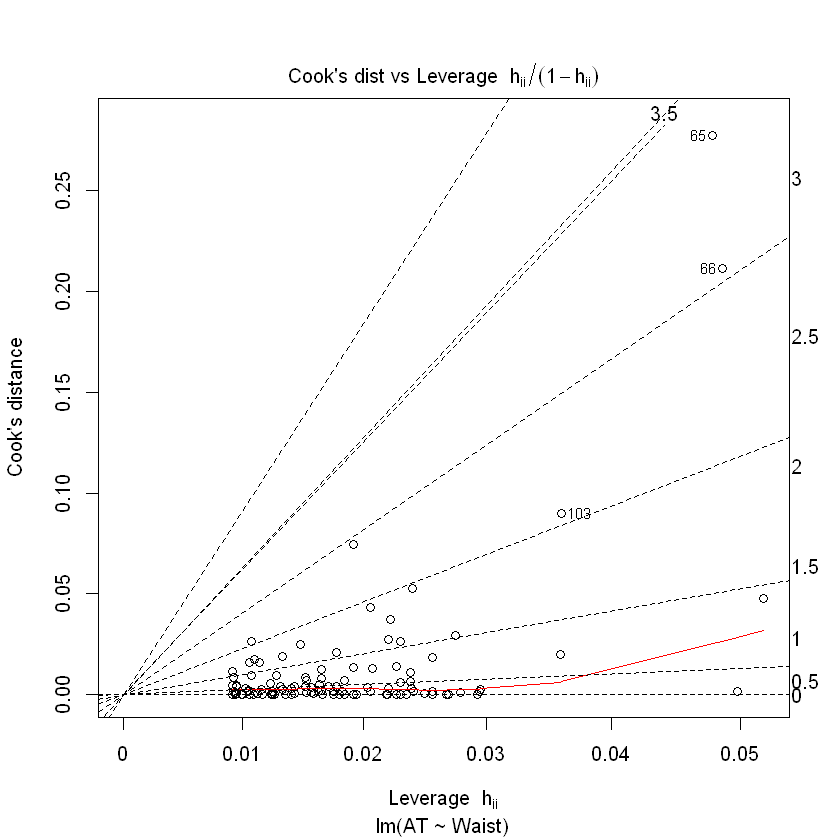

In [17]:
# model dignostic plot Can be indivisually seen , we can see each value and Hetrocatasticity which is affecting out data set
plot(lm,1) # (hetrocatasticity of data Residuals vs fitted red line visible)
plot(lm,2)# 97 is visible as outlier is visible
plot(lm,3)# Scale of values 
plot(lm,4)# cooks distance  visible as outliers excess value 65 , 66, 103
plot(lm,5)# residual Vs fitted values 
plot(lm,6)# Cooks disctance vs liverage view of outliers how it is influensive


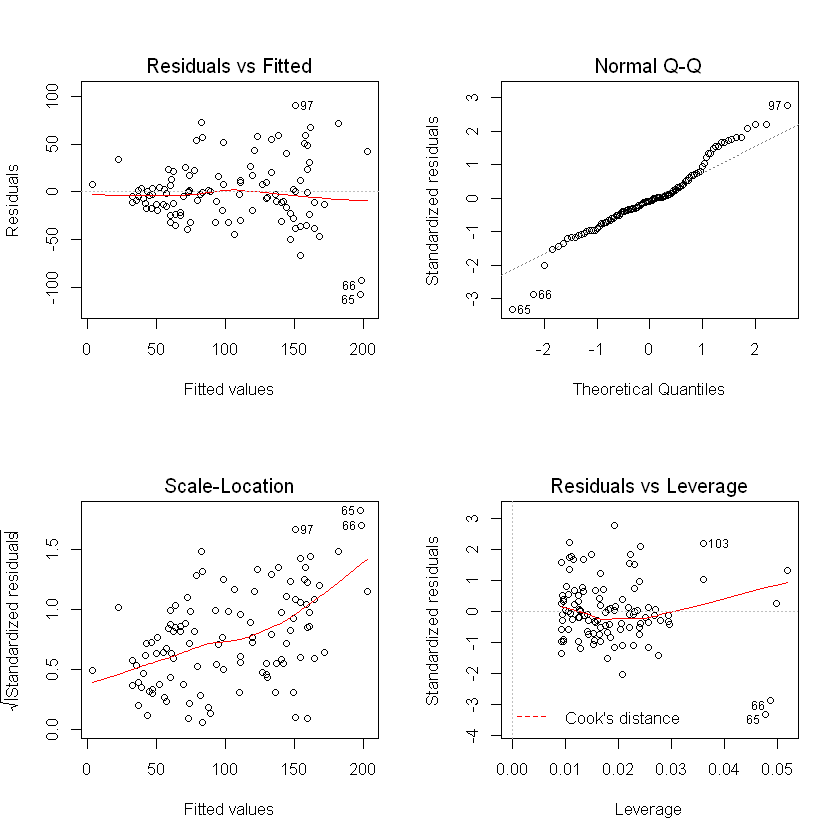

In [18]:
# dignostic plot togeather all need to increase size 
par(mfrow = c(2, 2))
plot(lm)

-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.0     v purrr   0.3.3
v tibble  3.0.1     v dplyr   0.8.5
v tidyr   1.0.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.5.0

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Attaching package: 'broom'


The following object is masked from 'package:modelr':

    bootstrap




Potentially influential observations of
	 lm(formula = AT ~ Waist, data = wcat) :

    dfb.1_ dfb.Wast dffit   cov.r   cook.d hat  
9    0.05  -0.05     0.06    1.07_*  0.00   0.05
58   0.12  -0.09     0.23    0.94_*  0.03   0.01
65   0.65  -0.70    -0.78_*  0.86_*  0.28   0.05
66   0.56  -0.61    -0.67_*  0.91_*  0.21   0.05
97  -0.24   0.29     0.40    0.90_*  0.07   0.02
103 -0.34   0.37     0.43_*  0.96    0.09   0.04


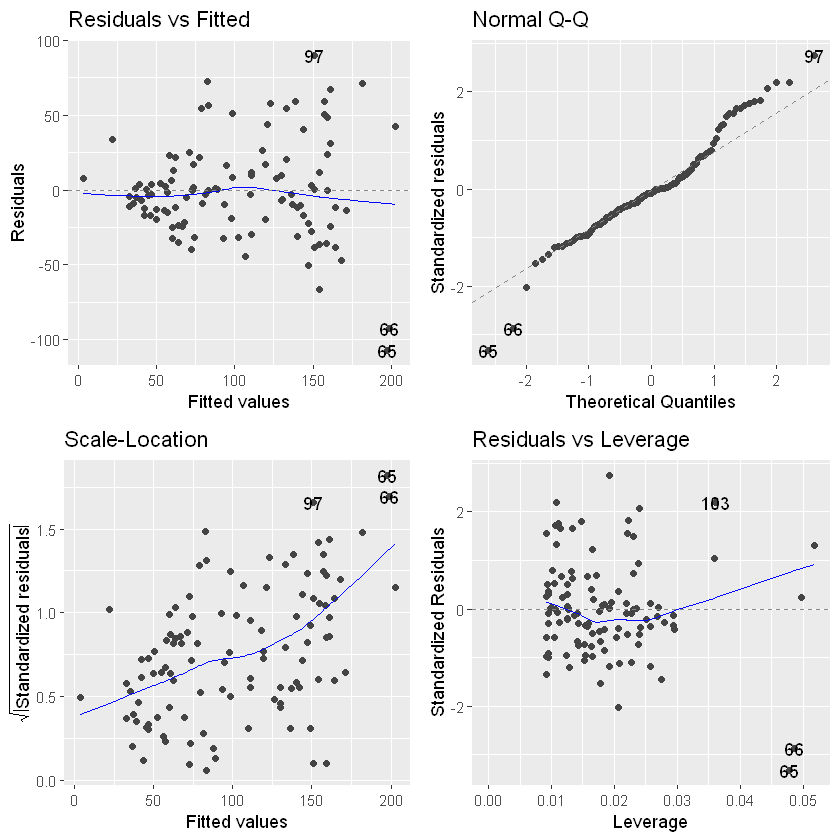

In [19]:
#dignostic plot togeather with outliers with autopilot
#install.packages("ggfortify")
# second method of dignostic plot ggplot 2 
library("tidyverse")
library("modelr")
library("broom")
library("ggfortify")
autoplot(lm)
summary(influence.measures(lm)) # we can have influence measure of cookr and hat value

In [20]:
# Exploring numbers and adding regrression line to daat 
outlierTest(lm) # to see the outliers we can see  65 as  outliers is it true
plot(wcat$AT~wcat$Waist,col="lightblue",pch =19,cex =2,data =wcat)
text(AT ~Waist, labels=rownames(wcat),data=wcat, cex=0.9, font=2)
abline(lm,col='red',lwd =3)

ERROR: Error in outlierTest(lm): could not find function "outlierTest"



Call:
lm(formula = AT ~ Waist, data = wcat)

Residuals:
     Min       1Q   Median       3Q      Max 
-107.288  -19.143   -2.939   16.376   90.342 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -215.9815    21.7963  -9.909   <2e-16 ***
Waist          3.4589     0.2347  14.740   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 33.06 on 107 degrees of freedom
Multiple R-squared:   0.67,	Adjusted R-squared:  0.667 
F-statistic: 217.3 on 1 and 107 DF,  p-value: < 2.2e-16


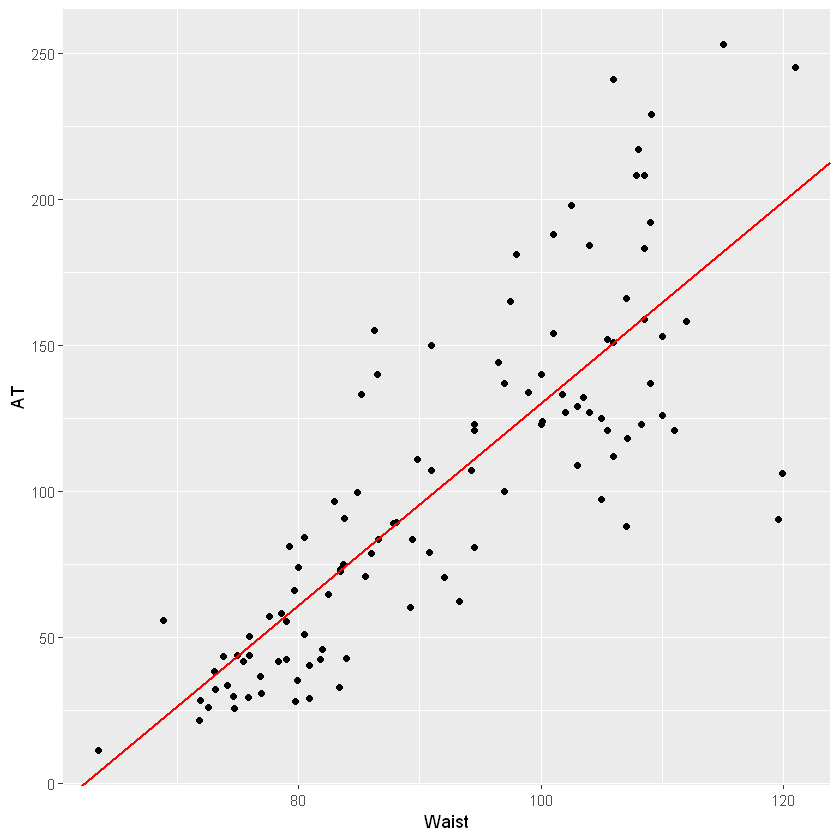

In [21]:
# adding regression line with ggplot2 A scattar plot 
ggplot(wcat,aes(x=Waist,y=AT)) +geom_point()+geom_abline(intercept = -215.981488  ,slope =  3.458859,color ='red',size =.65 )# visualizsing geoom point 

summary(lm)

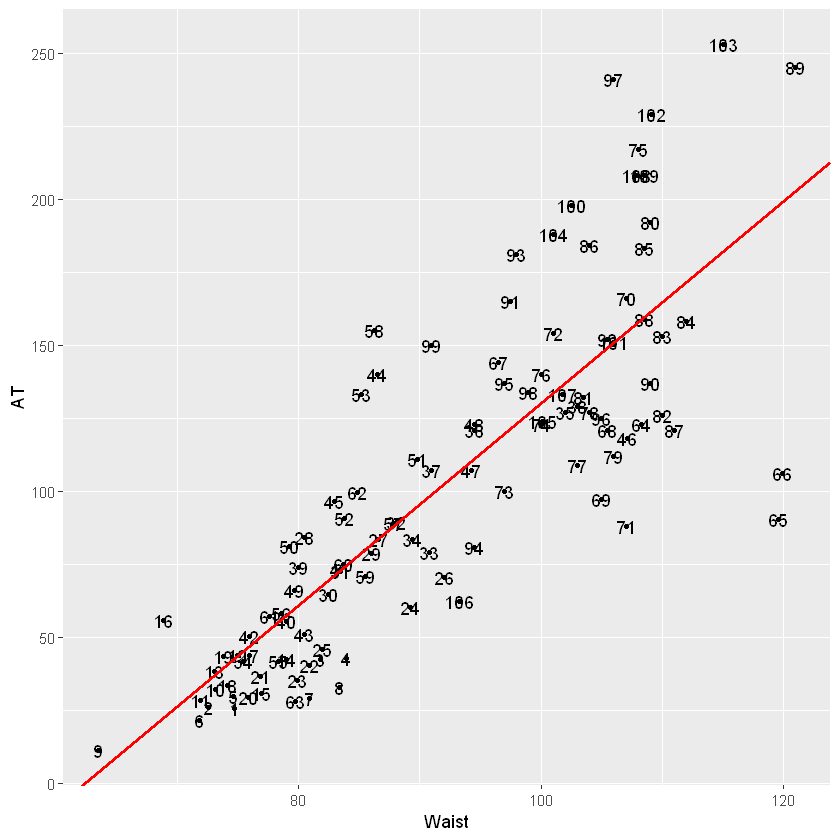

In [22]:
# ggpoot2 to visualise data potint understanding each data point 
ggplot(wcat,aes(x=Waist,y=AT)) + geom_point(size=1) + geom_text(label = row.names(wcat))+geom_abline(intercept = -215.981488  ,slope =  3.458859,color ='red',size =1 )# visualizsing geoom point with line

####################################### Checking normality of Data for further annalysis######################################

########################################## Model building #####################################################################

[1] 32.76018


Call:
lm(formula = AT ~ Waist, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-94.525 -19.918  -2.841  15.967  89.714 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -224.1995    24.9464  -8.987 5.73e-14 ***
Waist          3.5423     0.2653  13.351  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 32.07 on 85 degrees of freedom
Multiple R-squared:  0.6771,	Adjusted R-squared:  0.6733 
F-statistic: 178.2 on 1 and 85 DF,  p-value: < 2.2e-16


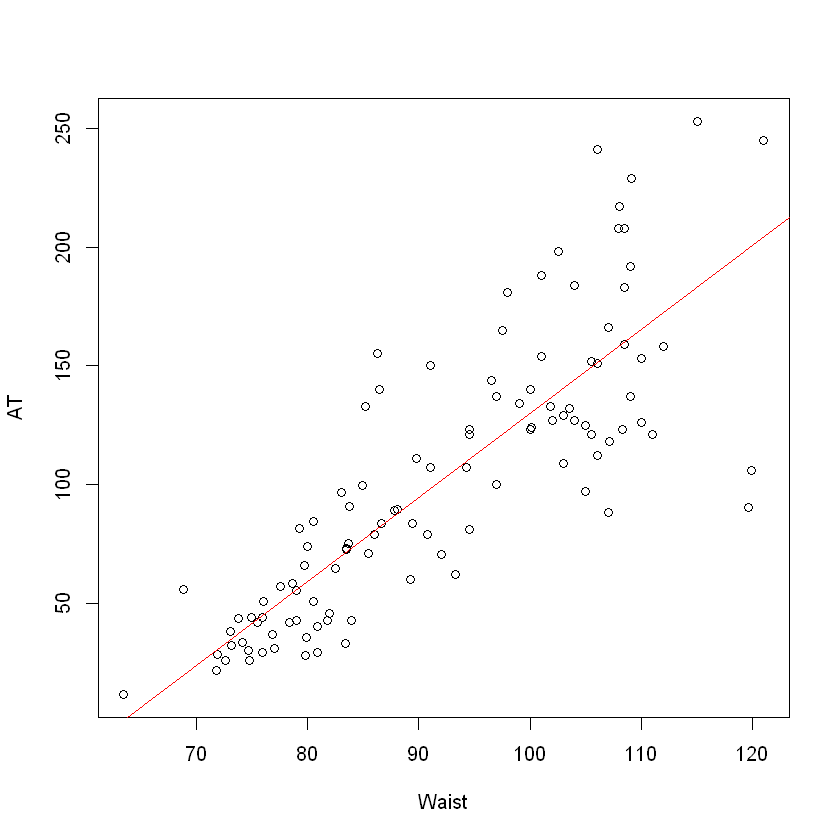

In [23]:
# lets make a linear model With training data set and test it 
# we trying to fit a linear regression line  by plotting linear model 
lm_train <- lm(AT~Waist,data=train) # linear model
rmse_train <- sqrt(mean(lm$residuals^2))
rmse_train # priliminary model gives rmse 32 which is error is higher 
plot(Waist, AT) # scatter plot X is Waist and y is AT
abline(lm(AT~Waist,data = train),col = 'red') # made a regression line 
summary(lm_train)



In [24]:
confint(lm_train,level=0.95)

,2.5 %,97.5 %
(Intercept),-273.799598,-174.599404
Waist,3.014777,4.069862


In [25]:
predict(lm_train, interval = "confidence")

,fit,lwr,upr
31,71.584173,63.06837,80.09998
79,151.286360,141.64854,160.92418
51,93.900785,86.84254,100.95903
14,55.643735,45.53143,65.75604
67,117.634326,110.56910,124.69955
42,45.016777,33.68774,56.34581
50,56.706431,46.71016,66.70270
43,60.957215,51.41294,70.50148
101,151.286360,141.64854,160.92418
106,106.298903,99.46127,113.13654


In [ ]:
plot(predict(lm_train, interval = "confidence"))

In [ ]:
pred1  <- predict(lm_train,test) # prediction points and visualizaton below
pred1

In [ ]:
plot(pred1) # our prediction is working lets validate it 
# lets check 10 value of pred
pred  <- predict(lm_train,test[0:10,]) # predicting 10 values 
pred # after prediction we are checking 10 values 

############################################  Cross Validation ############################################################

In [ ]:
# K-10 Fold valdation model is ready
library(lattice)
library(caret) 

# Fit linear regression model
Kfoldmodel <- train(AT ~ Waist, wcat,
                    method = "lm",
                    trControl = trainControl(
                      method = "cv", number = 10,
                      verboseIter = TRUE
                    )
) 

predicted <- predict(Kfoldmodel,wcat[0:10,]) 
predicted
wcat[21:32,] # the row predicted it worked AT is predicted 
# Evaluate error
actual <- wcat[0:10, "AT"]
err <-  sqrt(mean((predicted - actual)^2)) 
err

# print the model
Kfoldmodel

summary(Kfoldmodel) # p value is too low so we rejecting this model


In [ ]:
pred_train  <- predict(Kfoldmodel,train)
pred_train # the predicted values of train data 

pred_test  <- predict(Kfoldmodel,test)
pred_test # the predicted values of test data 



In [ ]:
# Log model-1 # exponentioal model
plot(log(Waist), AT) 
cor(log(Waist), AT)# cor relation little bit improved 
lm_Log_Waist <- lm(AT ~ log(Waist)) # log transformation
summary(lm_Log_Waist) # after transformatin r square improved but not significant

qqnorm(resid(lm_Log_Waist)) # checking residual value its not a linear
qqnorm(fitted.values(lm_Log_Waist)) # still it is not fitted values

rmse_waist <- sqrt(mean(lm_Log_Waist$residuals^2))
rmse_waist # rmse not imporved , residual errors is large
summary(rmse_waist) # rmse need to imporved 

In [ ]:
# log transformation 2  Exponential model 2 
# Log model-2 
plot(log(AT), Waist) 
cor(log(AT), Waist)
lm_Log_AT <-lm(Waist ~ log(AT)) # log transformation

summary(lm_Log_AT) # after transformatin r square little bit improved but not find model

qqnorm(resid(lm_Log_AT)) # checking residual value its not a linear
qqnorm(fitted.values(lm_Log_AT)) # still it is not fitted values

rmse_AT <- sqrt(mean(lm_Log_AT$residuals^2))
rmse_AT # rmse  imporved 
summary(rmse_waist)

In [ ]:
# log model 3 both waist and AT 
plot(log(AT), log(Waist)) 
cor(log(AT), log(Waist)) # cor relation little bit imporved 
lm_Log_AT_Waist <-lm(log(Waist) ~ log(AT)) # log transformation

summary(lm_Log_AT) # after transformatin r square little bit improved but not find model

qqnorm(resid(lm_Log_AT_Waist)) # checking residual value its not a linear
qqnorm(fitted.values(lm_Log_AT_Waist)) # still it is not fitted values

rmse_AT_Waist <- sqrt(mean(lm_Log_AT_Waist$residuals^2))
rmse_AT_Waist # rmse  imporved drastically reduced
summary(rmse_AT_Waist)

In [1]:
# Polynomial transformation
lm_3 <- lm(log(AT) ~ Waist + I(Waist * Waist))
summary(lm_3)

confint(lm_3,level=0.95)

log_res <- predict(lm_3,interval="confidence")
atpoly <- exp(log_res)
atpoly
err_poly <- AT - atpoly
err_poly

rmse3 <- sqrt(mean(err_poly^2))
rmse3



ERROR: Error in eval(predvars, data, env): object 'AT' not found
